# Baseline Model

Below we have the baseline model using an SVM network.

In [5]:
"""
Baseline Model - SVM
"""

import cv2
import numpy as np
import os

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
# from thundersvm import SVC

np.random.seed(0)
RANDOM_NUM = np.random.randint(1000)

FileNotFoundError: Please build the library first!

In [31]:
DATA_PATH = "KLARR_NET_data/fer_2013"

IMG_WIDTH = 48
IMG_HEIGHT = 48

def create_dataset(img_folder):
    """ Creates a dataset of the images in the given folder and returns the
    data and labels array.
    """
    img_data_array = []
    class_name = []
   
    for class_num, dir in enumerate(os.listdir(img_folder)):
        print(f"Class Num: {class_num}, Directory: {dir}")

        for i, filename in enumerate(os.listdir(os.path.join(img_folder, dir))):
            if i % 1000 == 0:
                print(i)

            # Read the image in grayscale
            image_path = os.path.join(img_folder, dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(
                image,
                (IMG_HEIGHT, IMG_WIDTH),
                interpolation=cv2.INTER_AREA
            )

            # Convert to numpy and normalize between 0 and 1
            image = np.array(image).astype('float32').flatten() / 255

            img_data_array.append(image)
            class_name.append(class_num)

    return np.array(img_data_array), np.array(class_name)

X_train, y_train = create_dataset(DATA_PATH)
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    train_size=0.7,
    random_state=RANDOM_NUM)

Class Num: 0, Directory: angry
0
1000
2000
3000
4000
Class Num: 1, Directory: fear
0
1000
2000
3000
4000
5000
Class Num: 2, Directory: happy
0
1000
2000
3000
4000
5000
Class Num: 3, Directory: neutral
0
1000
2000
3000
4000
5000
6000
Class Num: 4, Directory: sad
0
1000
2000
3000
4000
5000
6000
Class Num: 5, Directory: surprise
0
1000
2000
3000


In [32]:
CLASSES = ['angry', 'fear', 'happy' ,'neutral' ,'sad' ,'surprise']

def print_class_distribution_in_dataset(dataset_labels):
    num_classes = [0] * len(CLASSES)
    for label in dataset_labels:
        num_classes[label] += 1
    
    for i, num_of_class in enumerate(num_classes):
        print(f"Class: {CLASSES[i]}, Number of Classes: {num_of_class}")

print(f"Baseline Model Training Set Size: {len(X_train)}")
print_class_distribution_in_dataset(y_train)

print(f"\nBaseline Model Test Set Size: {len(X_test)}")
print_class_distribution_in_dataset(y_test)


Baseline Model Training Set Size: 22408
Class: angry, Number of Classes: 3467
Class: fear, Number of Classes: 3536
Class: happy, Number of Classes: 3958
Class: neutral, Number of Classes: 4365
Class: sad, Number of Classes: 4289
Class: surprise, Number of Classes: 2793

Baseline Model Test Set Size: 9604
Class: angry, Number of Classes: 1450
Class: fear, Number of Classes: 1545
Class: happy, Number of Classes: 1827
Class: neutral, Number of Classes: 1821
Class: sad, Number of Classes: 1773
Class: surprise, Number of Classes: 1188


In [33]:
# Instantiate the SVM classifier
# svm_classifier = svm.SVC(gamma=0.001)
svm_classifier = svm.SVC(
    kernel='linear',
    C=1,
    decision_function_shape='ovo',
)

# Fit to the training data
svm_classifier.fit(X_train, y_train)

SVC(C=1, decision_function_shape='ovo', kernel='linear')

In [36]:
y_pred = svm_classifier.predict(X_test)
classification_report = metrics.classification_report(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

baseline_test_acc = svm_classifier.score(X_test, y_test)
print(f"Baseline Model Test Accuracy: {baseline_test_acc}")

print(f"Classification report for classifier {svm_classifier}:")
print(f"\n{classification_report}")

print(f"\nConfusion matrix:\n\n{confusion_matrix}")

Baseline Model Test Accuracy: 0.3263223656809663
Classification report for classifier SVC(C=1, decision_function_shape='ovo', kernel='linear'):

              precision    recall  f1-score   support

           0       0.23      0.25      0.24      1450
           1       0.25      0.24      0.24      1545
           2       0.40      0.39      0.40      1827
           3       0.33      0.36      0.35      1821
           4       0.29      0.29      0.29      1773
           5       0.49      0.43      0.46      1188

    accuracy                           0.33      9604
   macro avg       0.33      0.33      0.33      9604
weighted avg       0.33      0.33      0.33      9604


Confusion matrix:

[[359 217 250 276 266  82]
 [229 368 212 280 282 174]
 [279 217 720 262 264  85]
 [247 248 223 651 343 109]
 [321 239 268 334 522  89]
 [127 176 112 141 118 514]]


In [15]:
# # Save model parameters so we can load it later
from joblib import dump, load
from pathlib import Path

BASELINE_MODEL_LOCATION = f"models/{svm_classifier}"

Path("models").mkdir(parents=True, exist_ok=True)
dump(svm_classifier, BASELINE_MODEL_LOCATION)

# To load the model, uncomment this line
# clf = load(BASELINE_MODEL_LOCATION)

SVC(C=1, decision_function_shape='ovo', kernel='linear')


# CNN Implementation

In [17]:
"""
CNN model Implementation
"""

import matplotlib.pyplot as plt
import numpy as np
import os 
import torch

from torchvision import datasets, transforms

np.random.seed(0)
torch.manual_seed(1000)
RANDOM_NUM = np.random.randint(1000)

In [18]:
CLASSES = None

def print_class_distribution_in_dataset(dataset_labels):
    num_classes = [0] * len(CLASSES)
    for label in dataset_labels:
        num_classes[label] += 1
    
    for i, num_of_class in enumerate(num_classes):
        print(f"Class: {CLASSES[i]}, Number of Classes: {num_of_class}")

In [19]:
IMG_WIDTH = 48
IMG_HEIGHT = 48

DATA_PATH = "KLARR_NET_data/fer_2013"

TRANSFORM_IMG = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    ])

total_data = datasets.ImageFolder(root=DATA_PATH, transform=TRANSFORM_IMG)
total_data_len = len(total_data)
CLASSES = total_data.classes

print('Number of Images : ', total_data_len)
print_class_distribution_in_dataset(total_data.targets)

Number of Images :  32012
Class: angry, Number of Classes: 4917
Class: fear, Number of Classes: 5081
Class: happy, Number of Classes: 5785
Class: neutral, Number of Classes: 6186
Class: sad, Number of Classes: 6062
Class: surprise, Number of Classes: 3981


In [20]:
train_data_len = int(total_data_len * 0.7)
valid_data_len = int(total_data_len * 0.15)
test_data_len = total_data_len - train_data_len - valid_data_len

train_data, valid_data, test_data = torch.utils.data.random_split(
    total_data,
    (train_data_len, valid_data_len, test_data_len)
)

print(f"Number of Training Images: {len(train_data)}")
print_class_distribution_in_dataset([datapoint[1] for datapoint in train_data])

print(f"\nNumber of Validation Images: {len(valid_data)}")
print_class_distribution_in_dataset([datapoint[1] for datapoint in valid_data])

print(f"\nNumber of Test Images: {len(test_data)}")
print_class_distribution_in_dataset([datapoint[1] for datapoint in test_data])


Number of Training Images: 22408
Class: angry, Number of Classes: 3452
Class: fear, Number of Classes: 3577
Class: happy, Number of Classes: 4053
Class: neutral, Number of Classes: 4254
Class: sad, Number of Classes: 4284
Class: surprise, Number of Classes: 2788

Number of Validation Images: 4801
Class: angry, Number of Classes: 733
Class: fear, Number of Classes: 743
Class: happy, Number of Classes: 885
Class: neutral, Number of Classes: 950
Class: sad, Number of Classes: 876
Class: surprise, Number of Classes: 614

Number of Test Images: 4803
Class: angry, Number of Classes: 732
Class: fear, Number of Classes: 761
Class: happy, Number of Classes: 847
Class: neutral, Number of Classes: 982
Class: sad, Number of Classes: 902
Class: surprise, Number of Classes: 579


In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class KLARR_NET(nn.Module):
    def __init__(self):
        super(KLARR_NET, self).__init__()
        self.name = 'KLARR_NET'

        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(1, 5, 5)
        self.conv2 = nn.Conv2d(5, 10, 5)

        self.fc1 = nn.Linear(9*9*10, 72)
        self.fc2 = nn.Linear(72, 6)

    def forward(self, x):
        # Convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # Linear layers
        x = x.view(-1, 9*9*10)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [58]:
from datetime import datetime

USE_CUDA = False

def get_model_name(name, batch_size, learning_rate, iteration):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_iter{3}_date{4}".format(
      name,
      batch_size,
      learning_rate,
      iteration,
      datetime.now().strftime("%d_%m-%Y_%H_%M")
    )
    return path

def get_accuracy(model, data_loader):
    correct, total = 0, 0

    for imgs, labels in data_loader:
      out = model(imgs)
      pred = out.max(1, keepdim=True)[1]
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]

    return correct / total

def train(
    model,
    train_data,
    val_data,
    batch_size=512,
    learning_rate=0.001,
    iterations=10,
    save=True):

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loss, train_acc, val_acc = [], [], []

    train_loader = torch.utils.data.DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=0
    )
    val_loader = torch.utils.data.DataLoader(
        val_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )

    for iteration in range(iterations):
        iter_loss = float(0)
        for imgs, labels in train_loader:
            if USE_CUDA:
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(imgs)
            loss = criterion(out, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            iter_loss += float(loss.item())

        # Compute training/validation accuracy/loss
        train_loss.append(iter_loss / len(train_loader))
        train_acc.append(get_accuracy(model, train_loader))
        val_acc.append(get_accuracy(model, val_loader))

        # Save model progress
        if save:
            model_path = get_model_name(model.name, batch_size, learning_rate, iteration)
            torch.save(model.state_dict(), f"models/{model_path}")

        print(("Iteration {}: Train loss: {}, Train accuracy: {}"
              " | Validation accuracy: {}").format(
                iteration + 1,
                train_loss[-1],
                train_acc[-1],
                val_acc[-1]
        ))

    # Plot model training information
    plt.title("Training Curve")
    plt.plot(range(1, iterations+1), train_loss, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(range(1, iterations+1), train_acc, label="Train")
    plt.plot(range(1, iterations+1), val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

Iteration 1: Train loss: 1.7593284493142909, Train accuracy: 0.2653070332024277 | Validation accuracy: 0.2699437617163091
Iteration 2: Train loss: 1.6930360848253423, Train accuracy: 0.316181720813995 | Validation accuracy: 0.32430743595084355
Iteration 3: Train loss: 1.634211003780365, Train accuracy: 0.35496251338807566 | Validation accuracy: 0.34992709852114146
Iteration 4: Train loss: 1.5983535945415497, Train accuracy: 0.36839521599428776 | Validation accuracy: 0.36575713393043113
Iteration 5: Train loss: 1.5755718350410461, Train accuracy: 0.3855765797929311 | Validation accuracy: 0.37783795042699436
Iteration 6: Train loss: 1.5466059879823164, Train accuracy: 0.3818279186004998 | Validation accuracy: 0.3801291397625495
Iteration 7: Train loss: 1.520010693506761, Train accuracy: 0.40525705105319526 | Validation accuracy: 0.40324932305769634
Iteration 8: Train loss: 1.4985610327937386, Train accuracy: 0.4070421278114959 | Validation accuracy: 0.4038741928764841
Iteration 9: Train 

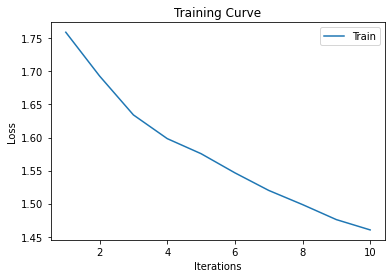

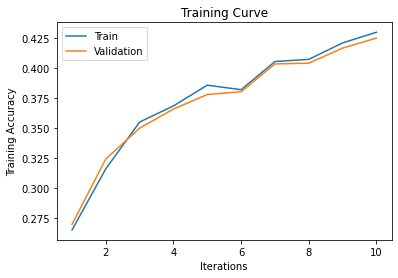

Final Training Accuracy: 0.42957872188504104
Final Validation Accuracy: 0.42470318683607583


In [59]:
model = KLARR_NET()

if USE_CUDA:
    model = model.cuda()

train(model, train_data, valid_data)